## EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

In [2]:
df = pd.read_csv("heart_disease.csv")  

In [3]:
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [18]:
print("Shape:", df.shape)

Shape: (10000, 21)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
df.isnull().sum().sort_values(ascending=False)

Alcohol Consumption     2586
Cholesterol Level         30
Sugar Consumption         30
Diabetes                  30
Age                       29
High LDL Cholesterol      26
CRP Level                 26
Triglyceride Level        26
High Blood Pressure       26
Sleep Hours               25
Low HDL Cholesterol       25
Smoking                   25
Exercise Habits           25
BMI                       22
Stress Level              22
Fasting Blood Sugar       22
Family Heart Disease      21
Homocysteine Level        20
Gender                    19
Blood Pressure            19
Heart Disease Status       0
dtype: int64

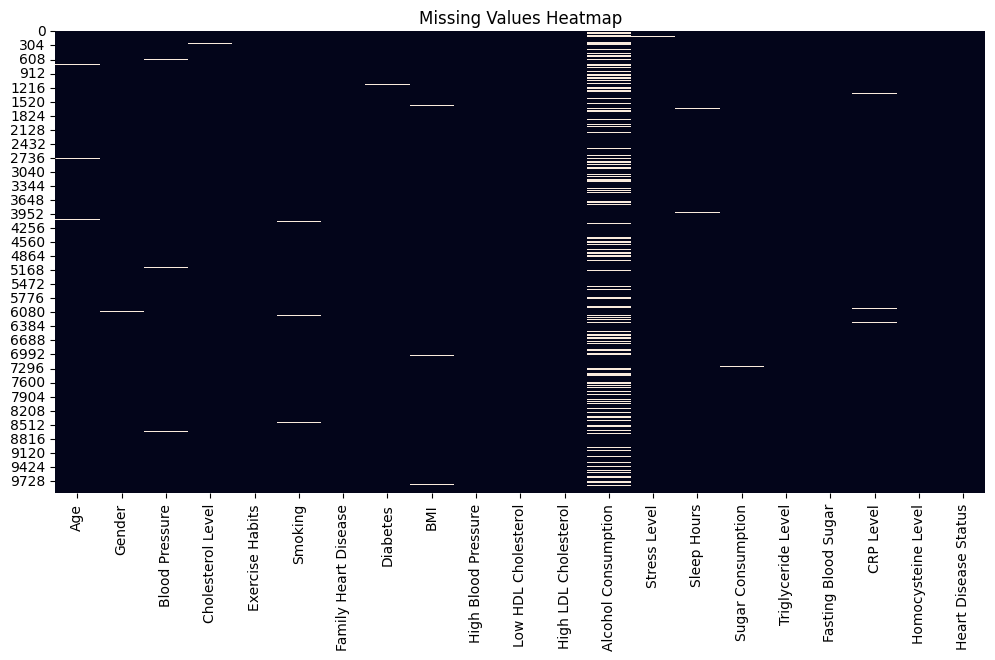

In [8]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [10]:
target = "Heart Disease Status"      

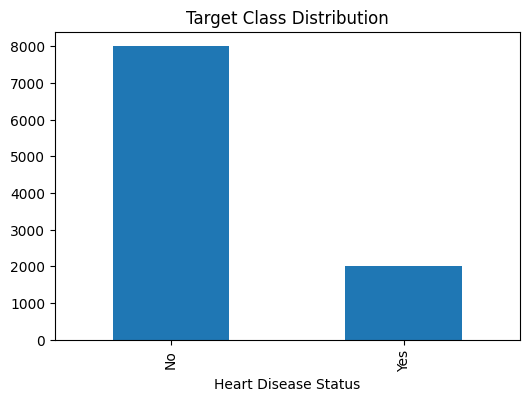

Heart Disease Status
No     80.0
Yes    20.0
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(6,4))
df[target].value_counts().plot(kind="bar")
plt.title("Target Class Distribution")
plt.show()

print(df[target].value_counts(normalize=True) * 100)

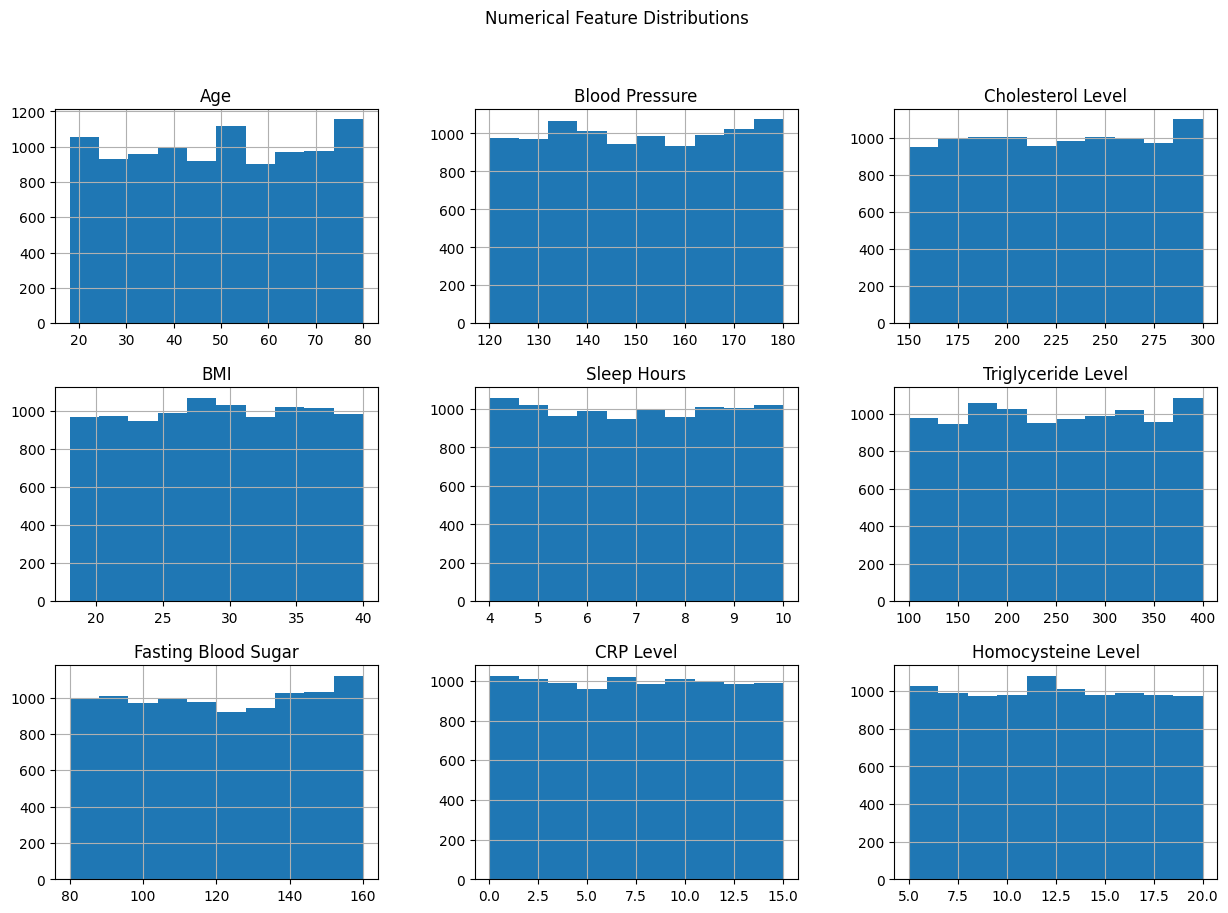

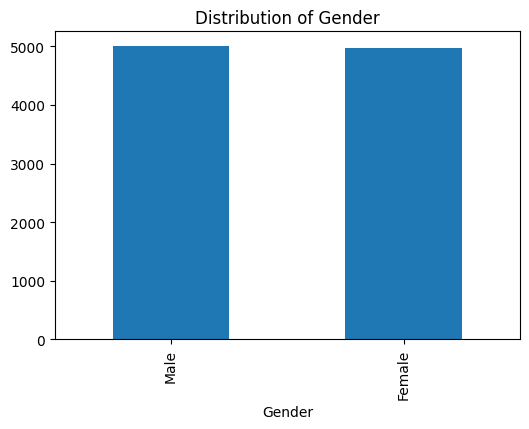

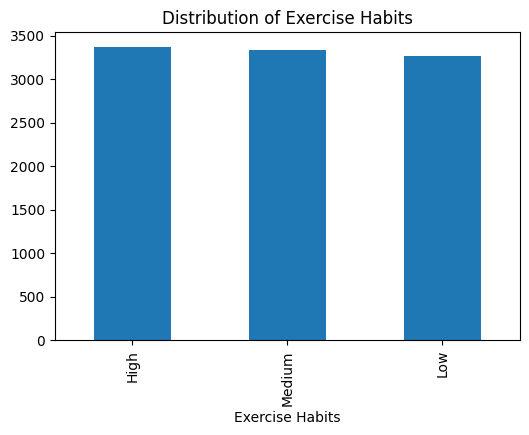

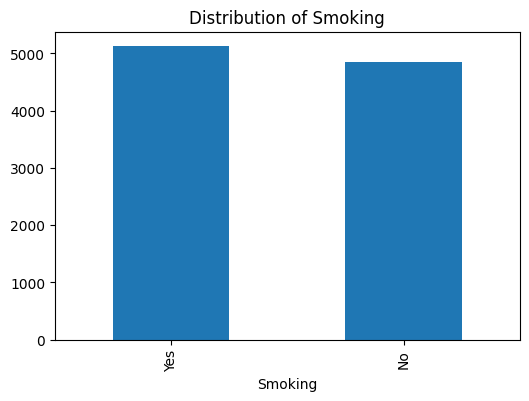

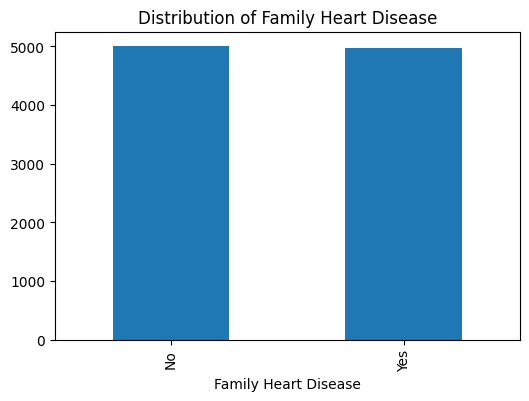

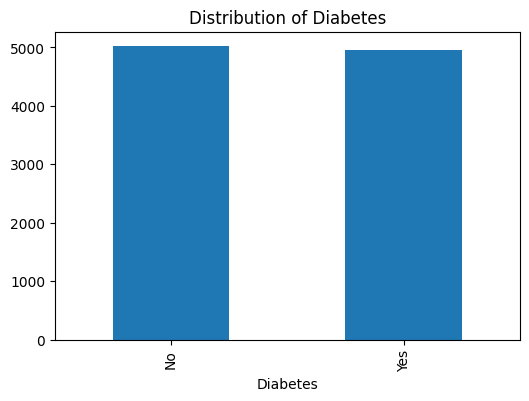

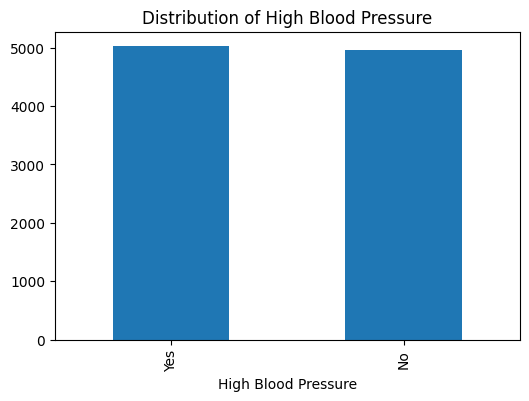

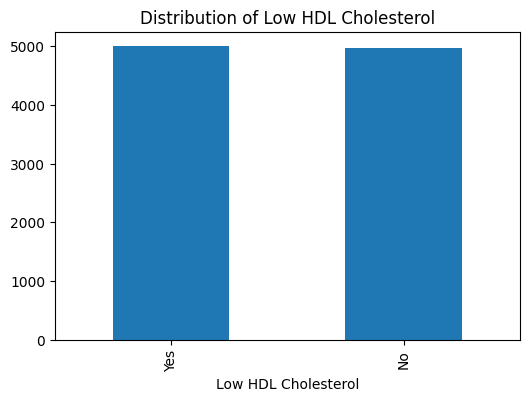

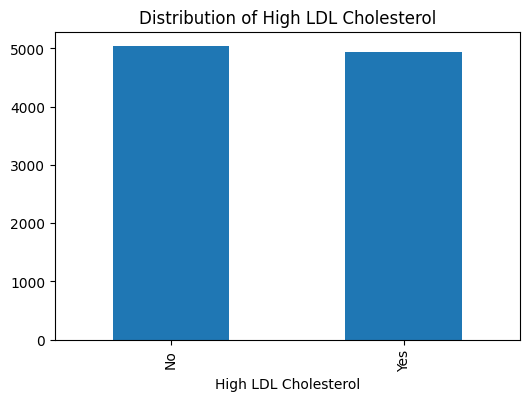

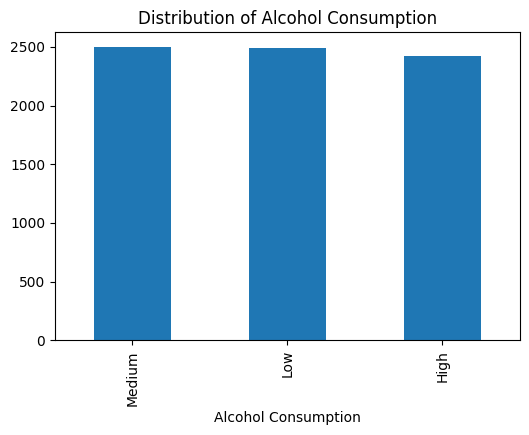

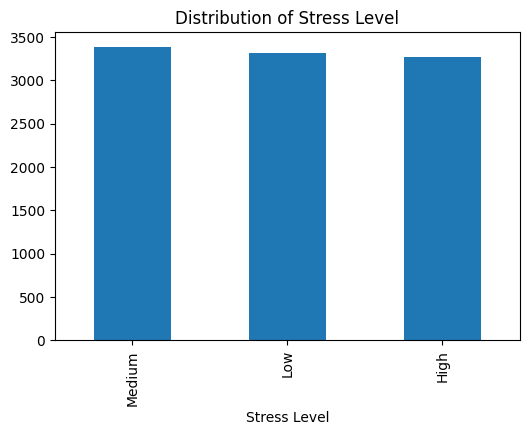

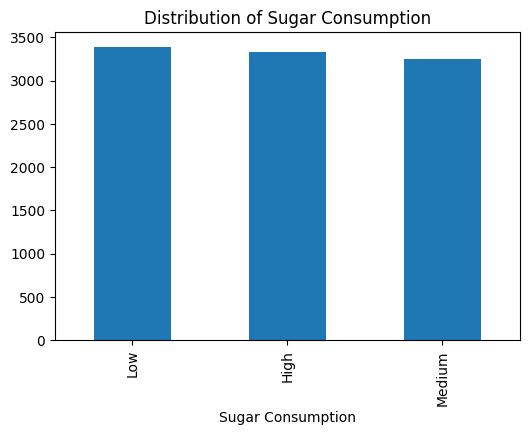

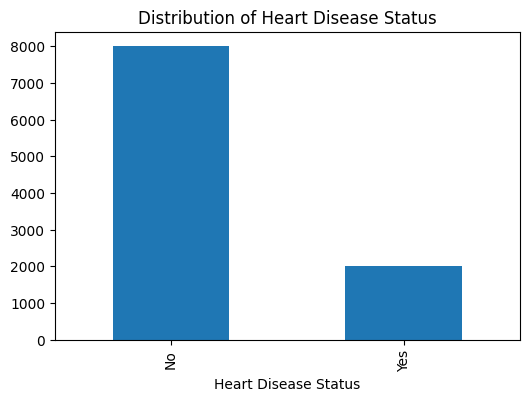

In [12]:
num_cols = df.select_dtypes(include=["int", "float"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Histograms for numerical features
df[num_cols].hist(figsize=(15,10))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Barplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.show()


## Box PLots

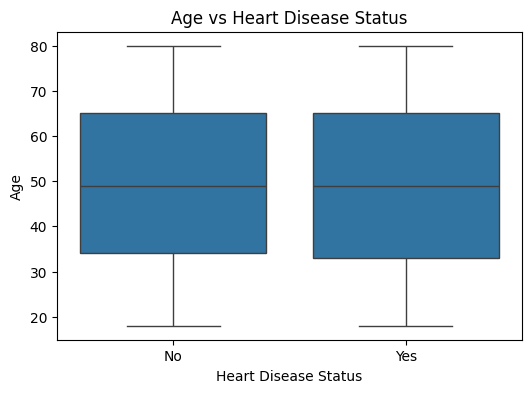

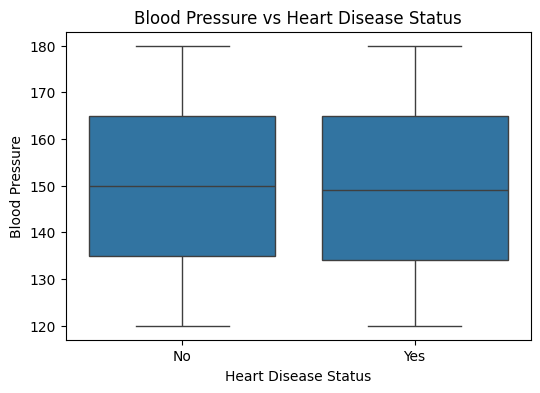

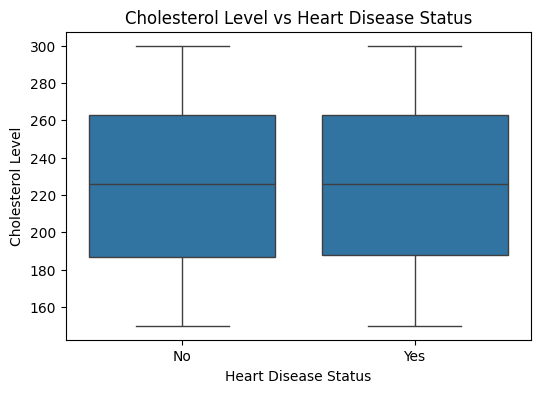

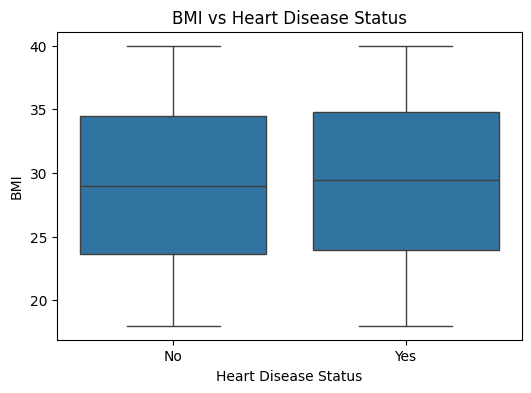

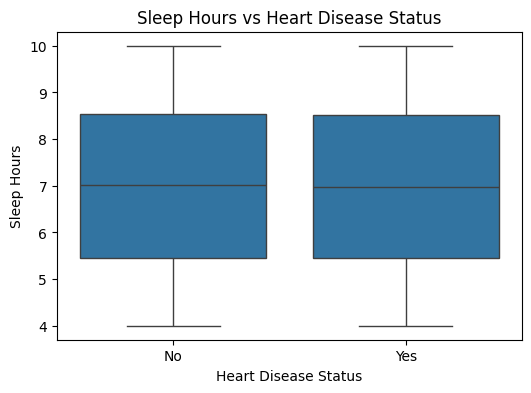

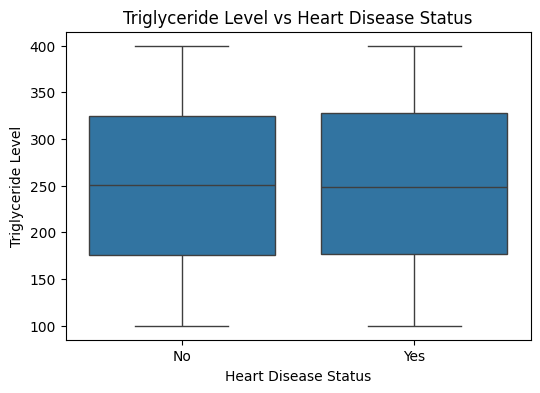

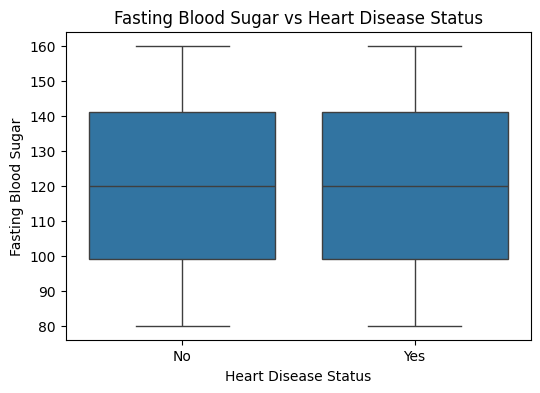

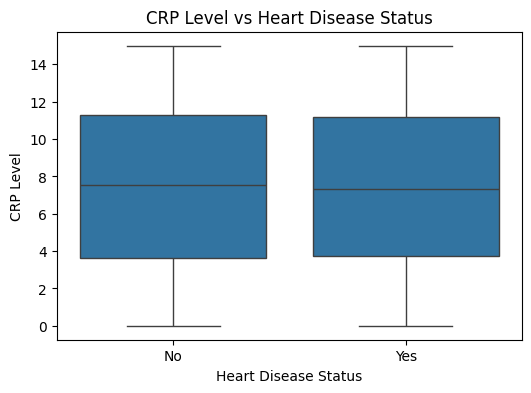

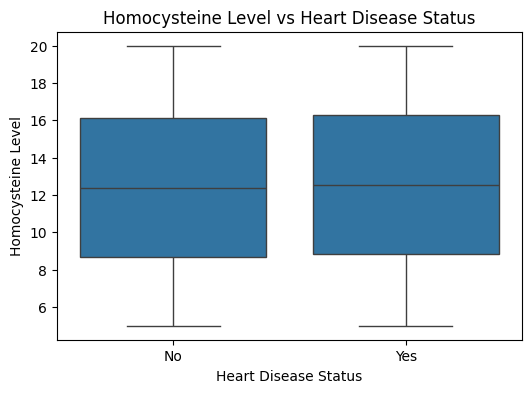

In [13]:
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()



Chi-square test for Gender:
Chi2ContingencyResult(statistic=2.6434596723857933, pvalue=0.1039768934515038, dof=1, expected_freq=array([[3981.00350666,  996.99649334],
       [4000.99649334, 1002.00350666]]))


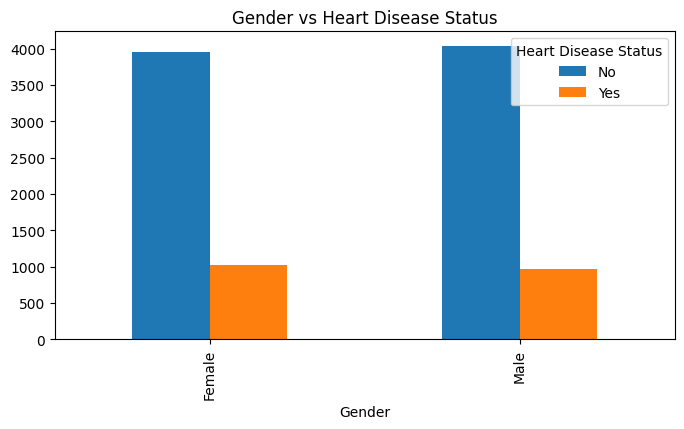


Chi-square test for Exercise Habits:
Chi2ContingencyResult(statistic=0.44948509243629003, pvalue=0.798721826245846, dof=2, expected_freq=array([[2696.24781955,  675.75218045],
       [2615.4883208 ,  655.5116792 ],
       [2664.26385965,  667.73614035]]))


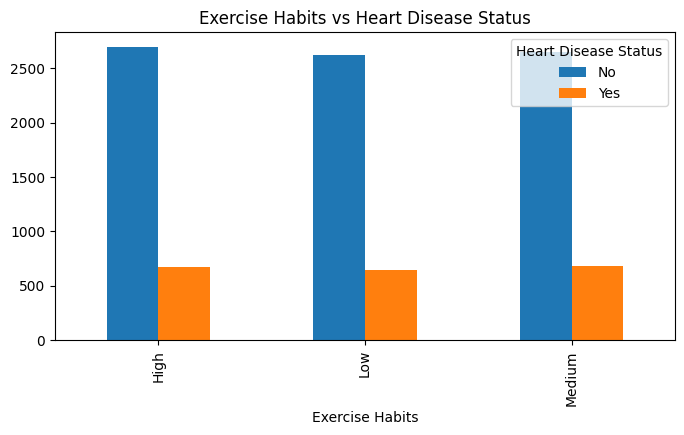


Chi-square test for Smoking:
Chi2ContingencyResult(statistic=0.048875800725703425, pvalue=0.8250311387918522, dof=1, expected_freq=array([[3882.08641604,  969.91358396],
       [4098.91358396, 1024.08641604]]))


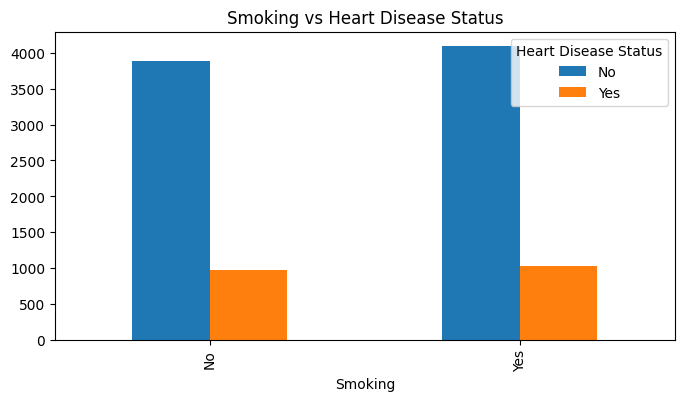


Chi-square test for Family Heart Disease:
Chi2ContingencyResult(statistic=0.4306519216111665, pvalue=0.5116692335334628, dof=1, expected_freq=array([[4004.60406854,  999.39593146],
       [3981.39593146,  993.60406854]]))


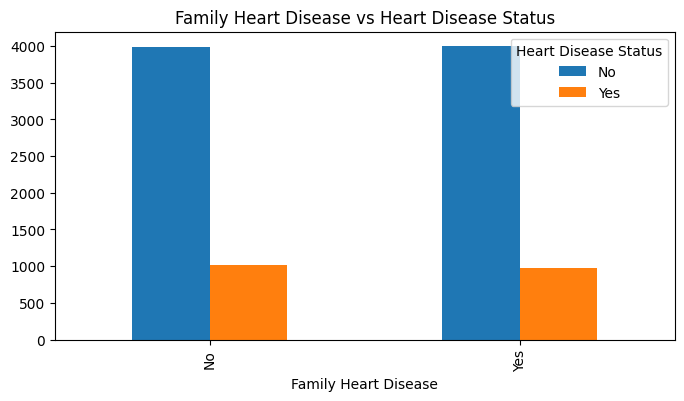


Chi-square test for Diabetes:
Chi2ContingencyResult(statistic=0.06020825532927986, pvalue=0.8061670867829933, dof=1, expected_freq=array([[4014.4, 1003.6],
       [3961.6,  990.4]]))


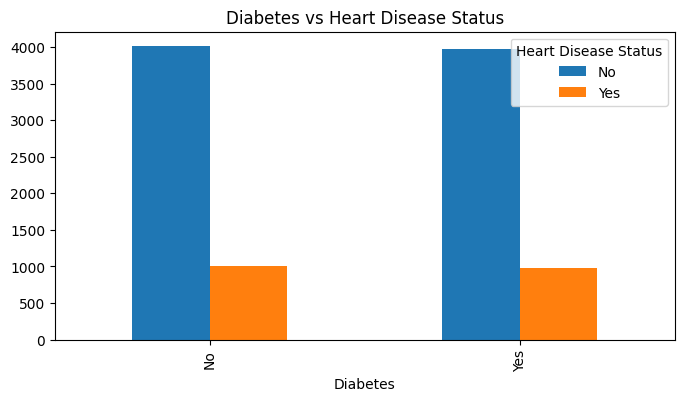


Chi-square test for High Blood Pressure:
Chi2ContingencyResult(statistic=0.040089159602574954, pvalue=0.841306355983287, dof=1, expected_freq=array([[3961.50070182,  990.49929818],
       [4017.49929818, 1004.50070182]]))


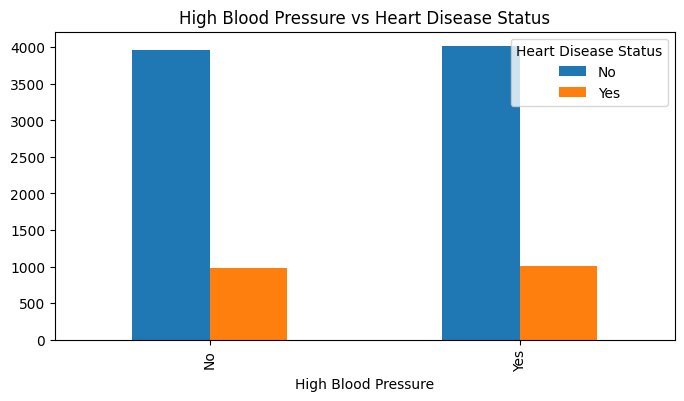


Chi-square test for Low HDL Cholesterol:
Chi2ContingencyResult(statistic=0.2762418192073506, pvalue=0.5991751086785513, dof=1, expected_freq=array([[3979.00250627,  995.99749373],
       [3998.99749373, 1001.00250627]]))


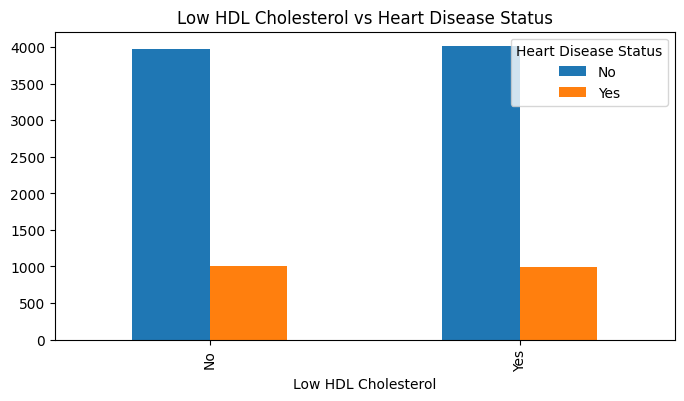


Chi-square test for High LDL Cholesterol:
Chi2ContingencyResult(statistic=0.5869947185058049, pvalue=0.44358360109222483, dof=1, expected_freq=array([[4028.19410467, 1007.80589533],
       [3949.80589533,  988.19410467]]))


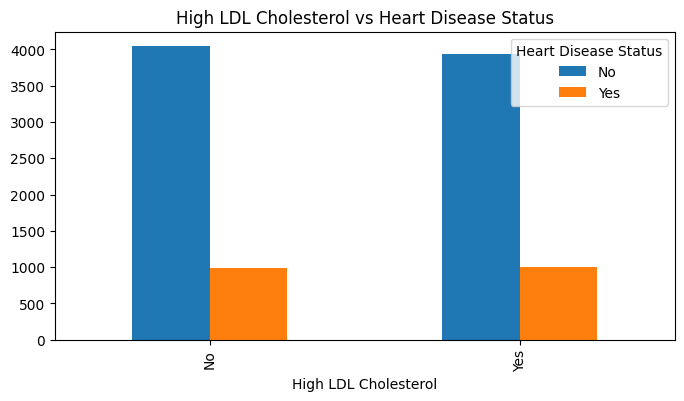


Chi-square test for Alcohol Consumption:
Chi2ContingencyResult(statistic=1.8581231793139326, pvalue=0.39492413743340565, dof=2, expected_freq=array([[1934.19018074,  491.80981926],
       [1983.62125708,  504.37874292],
       [1993.18856218,  506.81143782]]))


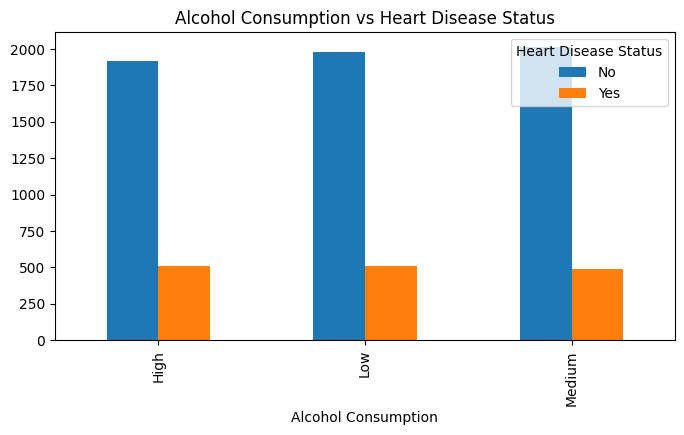


Chi-square test for Stress Level:
Chi2ContingencyResult(statistic=7.725660724693676, pvalue=0.021008453758264992, dof=2, expected_freq=array([[2616.34105031,  654.65894969],
       [2655.53417519,  664.46582481],
       [2709.1247745 ,  677.8752255 ]]))


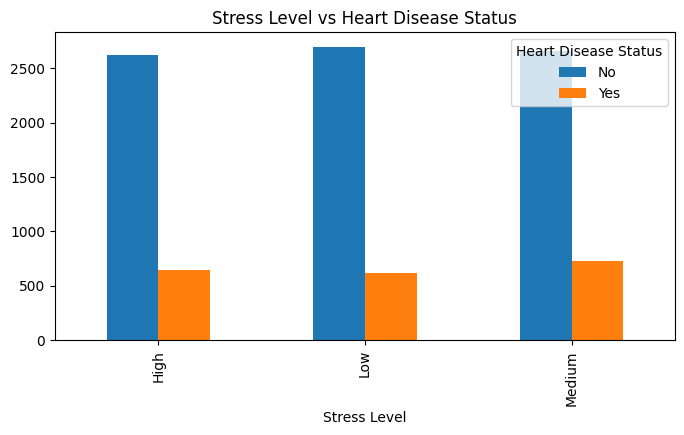


Chi-square test for Sugar Consumption:
Chi2ContingencyResult(statistic=1.3292564157400344, pvalue=0.5144647661051547, dof=2, expected_freq=array([[2665.00200602,  664.99799398],
       [2713.02006018,  676.97993982],
       [2600.9779338 ,  649.0220662 ]]))


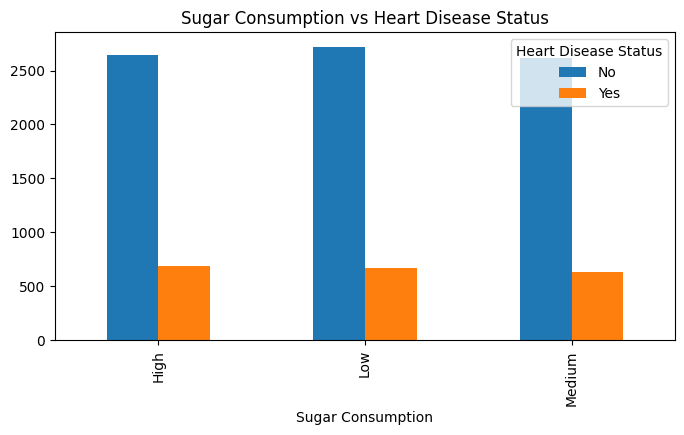

In [14]:
for col in cat_cols:
    if col != target:
        ct = pd.crosstab(df[col], df[target])
        print(f"\nChi-square test for {col}:")
        print(chi2_contingency(ct))

        ct.plot(kind="bar", figsize=(8,4))
        plt.title(f"{col} vs {target}")
        plt.show()

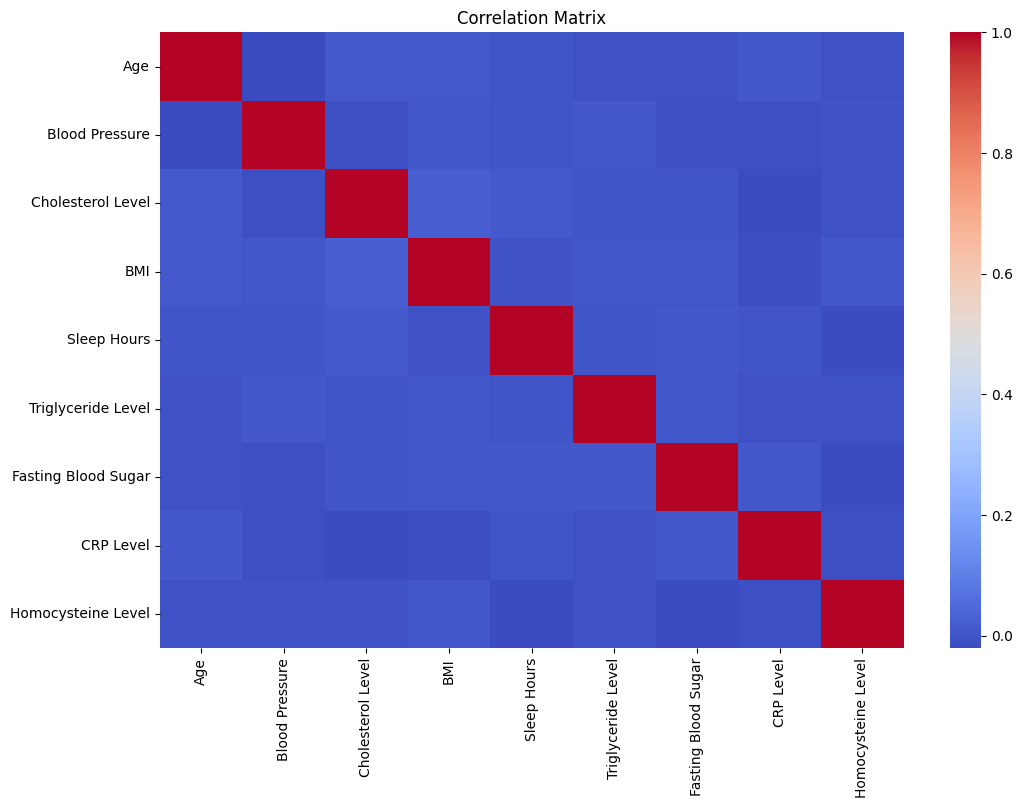

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [16]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Blood Pressure: 0 outliers
Cholesterol Level: 0 outliers
BMI: 0 outliers
Sleep Hours: 0 outliers
Triglyceride Level: 0 outliers
Fasting Blood Sugar: 0 outliers
CRP Level: 0 outliers
Homocysteine Level: 0 outliers
